In [5]:
!pip install LIME

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for LIME: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=d3cac22b5145991171f725c2b89d583b7c40b33113228846ea75a9b1f6b1a554
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built LIME


In [1]:
import os
import keras
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
inet_model = inc_net.InceptionV3()

96112376/96112376 [==============================] - 3s 0us/step


In [3]:
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(299, 299))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = inc_net.preprocess_input(x)
        out.append(x)
    return np.vstack(out)

35363/35363 [==============================] - 0s 0us/step
('n02123045', 'tabby', 0.6952902)
('n02123159', 'tiger_cat', 0.20272593)
('n02124075', 'Egyptian_cat', 0.03619808)
('n04589890', 'window_screen', 0.0034429159)
('n03794056', 'mousetrap', 0.0029651034)


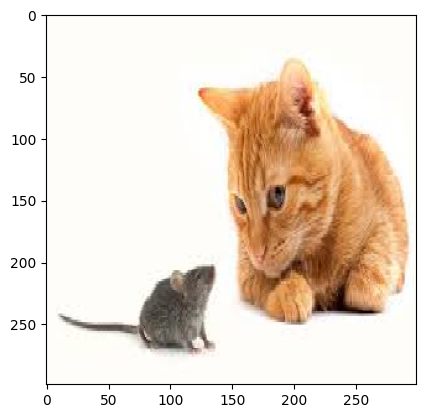

In [4]:
images = transform_img_fn([os.path.join('cat_mouse.jpg')])
# I'm dividing by 2 and adding 0.5 because of how this Inception represents images
plt.imshow(images[0] / 2 + 0.5)
preds = inet_model.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

In [6]:
from lime import lime_image
explainer = lime_image.LimeImageExplainer()

In [7]:
explanation = explainer.explain_instance(images[0].astype('double'), inet_model.predict, top_labels=5, hide_color=0, num_samples=1000)


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


In [8]:
from skimage.segmentation import mark_boundaries

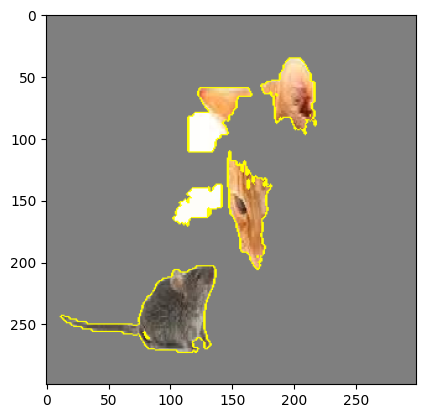

In [9]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))